# Hypothesis Testing Revisited

The power of a hypothesis test depends on the sample size and the effect size. So, a smaller sample size can detect a large effect size. On the other hand, a large sample size can detect a tiny effect size.

This means that if we are working with a large sample (as we often are when doing data analysis), we can uncover a statistically significant result, which is of no practial importance. 

For example, clinical trial researchers sometimes mean when a result is statistically significant but not "clinically significant." They mean by that one treatment may be better than placebo, but the difference is so marginal that it would make no difference to the patient within a clinical context.

## Measuring Effect Size

The most common way to measure effect size is through the use of Cohen's $d$. Say we have two samples with sample means $\bar{x}_1$ and $\bar{x}_2$. Then Cohen's $d$ is equal to 
$$\text{Cohen's } d = \frac{\bar{x}_1 - \bar{x}_2}{s}$$
where $s$ is a measure of the standard deviation, usually the *pooled* standard deviation, given by
$$s = \sqrt{\frac{s_1^2 + s_2^2}{2}}$$
where $s_1$ and $s_2$ are the sample standard deviations for each sample separately.

Stolen from https://www.leeds.ac.uk/educol/documents/00002182.htm:

Consider this article: https://onlinelibrary.wiley.com/doi/abs/10.1111/j.2044-8295.1977.tb01557.x

This is an experiment by Dr. Simon Fokard who was trying to determine whether children learn better in the morning or afternoon? 

A group of 38 children were included in the experiment. 

Half were randomly allocated to listen to a story and answer questions about it (on tape) at 9am, the other half to hear exactly the same story and answer the same questions at 3pm. 

Their comprehension was measured by the number of questions answered correctly out of 20.

Morning group average: 15.2

Afternoon group average: 17.9

Difference between group averages: 2.7

So what? What more information could make this meaningful? We could look at the amount of variation in scores to contextualize the difference.

On the one hand, if there were no overlap at all and every single person in the afternoon group had done better on the test than everyone in the morning group, then this would seem like a very substantial difference. 

On the other hand, if the spread of scores were large and the overlap much bigger than the difference between the groups, then the effect might seem less significant. 

Because we have an idea of the amount of variation found within a group, we can use this as a yardstick against which to compare the difference. This idea is quantified in the calculation of the effect size. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

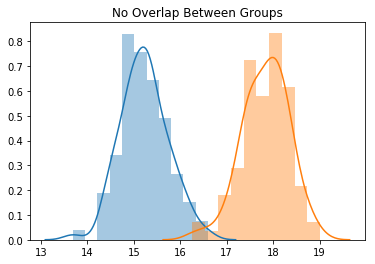

In [2]:
morning_group = np.random.normal(loc = 15.2, scale = 0.5, size = 100)
afternoon_group = np.random.normal(loc = 17.9, scale = 0.5, size = 100)

fig, ax = plt.subplots()
sns.distplot(morning_group, ax = ax)
sns.distplot(afternoon_group, ax = ax)
plt.title('No Overlap Between Groups');

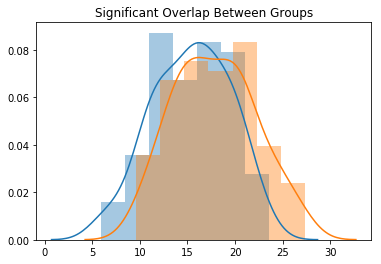

In [3]:
morning_group = np.random.normal(loc = 15.2, scale = 4, size = 100)
afternoon_group = np.random.normal(loc = 17.9, scale = 4, size = 100)

fig, ax = plt.subplots()
sns.distplot(morning_group, ax = ax)
sns.distplot(afternoon_group, ax = ax)
plt.title('Significant Overlap Between Groups');

For this experiment, the pooled standard deviation was 3.3. This means that the effect size was equal to

$$\frac{17.9 - 15.2}{3.3} = 0.8$$

What does this mean? That the average person in the afternoon group scored 0.8 standard deviations higher than the average person in the morning group. 

If our data is reasonably close to normally-distributed, we can further interpret this difference.

In [4]:
from scipy.stats import norm
norm.cdf(0.8)

0.7881446014166034

This shows that for a normally distributed population, 79\% of observations will be in the region from negative infinity to 0.8 standard deviations above the mean.

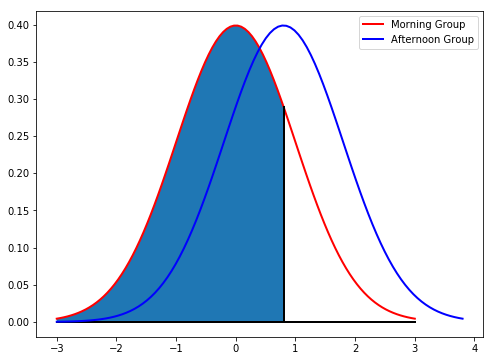

In [11]:
norm_dist = norm()
x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(x, norm_dist.pdf(x), 'k-', lw=2, color = 'red', label = 'Morning Group')

x = np.linspace(-3, 0.8, 100)

ax.fill_between(x[x <= 0.8], 0, norm_dist.pdf(x[x <= 0.8]))

plt.plot([0.8, 0.8], [0,norm_dist.pdf(0.8)], color = 'black', linewidth = 2);

plt.plot([-3, 3], [0,0], color = 'black', linewidth = 2)

afternoon_dist = norm(loc = 0.8)
x = np.linspace(-3, 3.8, 100)
ax.plot(x, afternoon_dist.pdf(x), 'k-', lw=2, color = 'blue', label = 'Afternoon Group')


plt.legend();

What is the probability that is we choose a person at random from the morning group and a person at random from the afternoon group, that the person from the afternoon group will score higher?

To answer this, we'll use the fact that if $A \sim N(\mu_1, \sigma_1)$ and $B \sim N(\mu_2, \sigma_2)$, then $A-B \sim N(\mu_1 - mu_2, \sqrt{\sigma_1^2, \sigma_2^2})$

In [18]:
diff_dist = norm(loc = 0.8, scale = np.sqrt(2))

1 - diff_dist.cdf(0)

0.7141961775233342

This shows that for an effect size of 0.8, there is a 71.4% chance that a randomly chosen person from the afternoon will have a higher score than a randomly chosen person from the morning group.

What if the effect size had only been 0.1?

In [12]:
norm.cdf(0.1)

0.539827837277029

Only 54% of those in the morning group would have been below the average for the afternoon group. This difference seems of much less practial significance (even though it was statistically significant).

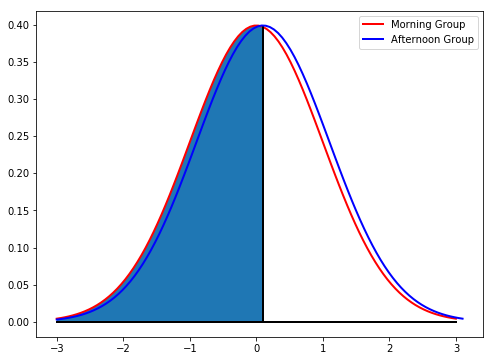

In [13]:
norm_dist = norm()
x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(x, norm_dist.pdf(x), 'k-', lw=2, color = 'red', label = 'Morning Group')

x = np.linspace(-3, 0.1, 100)

ax.fill_between(x[x <= 0.1], 0, norm_dist.pdf(x[x <= 0.1]))

plt.plot([0.1, 0.1], [0,norm_dist.pdf(0.1)], color = 'black', linewidth = 2);

plt.plot([-3, 3], [0,0], color = 'black', linewidth = 2)

afternoon_dist = norm(loc = 0.1)
x = np.linspace(-3, 3.1, 100)
ax.plot(x, afternoon_dist.pdf(x), 'k-', lw=2, color = 'blue', label = 'Afternoon Group')


plt.legend();

In [19]:
diff_dist = norm(loc = 0.1, scale = np.sqrt(2))

1 - diff_dist.cdf(0)

0.5281859888985083

For a small effect size, there is only a 53% chance that a randomly chosen person from the afternoon group will have a higher score than a randomly chosen person from the morning group.

Let's look at another example. The folling dataset has a larger sample of sleeping times by sex from the American Time Use Survey.

In [20]:
import pandas as pd
sleeping_times = pd.read_csv('../data/atus_sleeping_large_sample.csv')

In [23]:
sleeping_times.groupby('sex').minutes_spent_sleeping.agg(['mean', 'std', 'count'])

,mean,std,count
sex,,,
Female,533.543128,136.714122,5275
Male,525.830477,139.155526,4318


This shows that in our sample, the Females slept on average, for 8 minutes longer than the Males. Let's use a t-test to see if this difference is statistically significant.



First, let's set up our null and alternative hypotheses. Remember that the null hypothesis says that there is no difference between the population means. Let $\mu_M$ represent the average time spent sleeping by males and $\mu_F$ represent the average time spent sleeping by females.

**Null Hypothesis:**

$H_0: \mu_M = \mu_F$

**Alternative Hypothesis:**

$H_A: \mu_M < \mu_F$

In [29]:
from scipy.stats import ttest_ind
t_results = ttest_ind(sleeping_times.loc[sleeping_times.sex == 'Male', 'minutes_spent_sleeping'],
                      sleeping_times.loc[sleeping_times.sex == 'Female', 'minutes_spent_sleeping'],
                     equal_var = False)

Here, we are doing a one-sided test, so we need to divide the $p$-value by 2.

In [30]:
print(t_results.pvalue / 2)

0.00324950546985067


This says that, if there is no difference in population means, then we would only see a difference as large as we did 0.3% of the time. This means that we need to reject the null hypothesis and conclude that there is statistically significant evidence that females sleep more on average than males.

But, let's find the effect size to put some context to our finding.

In [35]:
pooled_std = np.sqrt((
    np.std(sleeping_times.loc[sleeping_times.sex == 'Male', 'minutes_spent_sleeping'])**2 + 
    np.std(sleeping_times.loc[sleeping_times.sex == 'Female', 'minutes_spent_sleeping'])**2) / 2) 

cohen_d = (np.mean(sleeping_times.loc[sleeping_times.sex == 'Female', 'minutes_spent_sleeping']) - 
           np.mean(sleeping_times.loc[sleeping_times.sex == 'Male', 'minutes_spent_sleeping'])) / pooled_std
print(cohen_d)

0.05591889180988379


This effect size is tiny. Notice from above that the observed difference is less than 8 minutes, but the standard deviation values are around 137, so the observed difference, which statistically significant, is tiny compared to the overall variability in the data.

In [39]:
norm.cdf(cohen_d)

0.5222967895557225

This shows that only 52.2% of males slept for fewer minutes than the average female.

Let's standardize and plot the assumed population distributions to get an idea of the effect that we have uncovered.

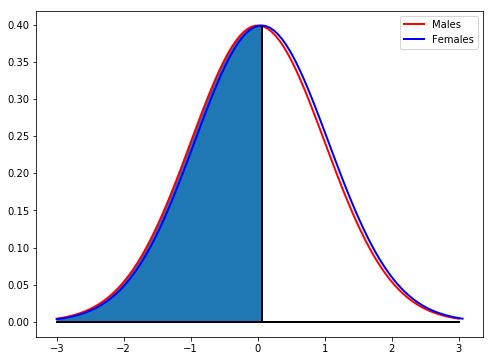

In [37]:
effect_size = cohen_d

norm_dist = norm()
x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(x, norm_dist.pdf(x), 'k-', lw=2, color = 'red', label = 'Males')

x = np.linspace(-3, effect_size, 100)

ax.fill_between(x[x <= effect_size], 0, norm_dist.pdf(x[x <= effect_size]))

plt.plot([effect_size, effect_size], [0,norm_dist.pdf(0.1)], color = 'black', linewidth = 2);

plt.plot([-3, 3], [0,0], color = 'black', linewidth = 2)

afternoon_dist = norm(loc = effect_size)
x = np.linspace(-3, 3 + effect_size, 100)
ax.plot(x, afternoon_dist.pdf(x), 'k-', lw=2, color = 'blue', label = 'Females')


plt.legend();

In [38]:
diff_dist = norm(loc = cohen_d, scale = np.sqrt(2))

1 - diff_dist.cdf(0)

0.5157703186539964

So, for a ranomly chosen female, there is only a 51.6% chance that she sleeps longer than a randomly chosen male.